In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.utils import to_categorical
x_train = x_train/255.0 # 0~1사이 스케일링
x_test = x_test/255.0 # 0~1사이 스케일링
y_train = to_categorical(y_train) # 원핫인코딩
y_test = to_categorical(y_test) # 원핫인코딩

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,      # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,   # randomly flip images horizontally
    # You can also add other augmentations like zoom_range, shear_range, etc.
)

# Compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
train_datagen.fit(x_train)


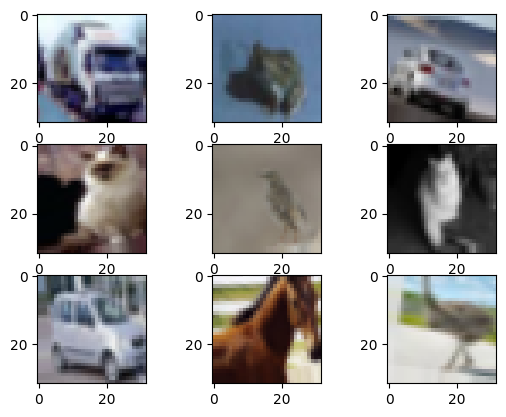

In [ ]:
import matplotlib.pyplot as plt
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # Create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32, 3))
    # Show the plot
    plt.show()
    break

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid= train_test_split(x_train,y_train,
                                                     test_size=0.2,
                                                     shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) # 모델 규
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    batch_size=32,
                    validation_data=(x_valid,y_valid))

Epoch 1/20
1250/1250 [==============================] - 37s 21ms/step - loss: 1.7536 - accuracy: 0.3541 - val_loss: 1.3747 - val_accuracy: 0.5037
Epoch 2/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4867 - accuracy: 0.4607 - val_loss: 1.2579 - val_accuracy: 0.5488
Epoch 3/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.3784 - accuracy: 0.5063 - val_loss: 1.1700 - val_accuracy: 0.5827
Epoch 4/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.3169 - accuracy: 0.5305 - val_loss: 1.0847 - val_accuracy: 0.6083
Epoch 5/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2680 - accuracy: 0.5499 - val_loss: 1.1033 - val_accuracy: 0.6019
Epoch 6/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2249 - accuracy: 0.5676 - val_loss: 1.0856 - val_accuracy: 0.6142
Epoch 7/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2035 - accuracy: 0.5745 - val_loss: 0.9966 -